# 二手房房价分析

数据集来源：https://www.kesci.com/home/project/5a20151936ae5c1293b51e71/dataset  
本文针对北京二手房分析。

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 12,'font.sans-serif':'Microsoft YaHei'})

In [2]:
bj = pd.read_csv("./bj.csv",encoding='gbk')
bj.head()

,简介,小区,户型,面积,关注人数,观看次数,发布时间,房价,单价/平,城区,经纬度
0,户型方方正正 满五年就一套 视野开阔直观汇文中学,保利蔷薇,2室2厅,88.63平米,58人关注,共27次带看,19天以前发布,960.0,单价108316元/平米,东城,"116.442531,39.89667"
1,禾风相府 南北通透 三居室 前后花园 人车分流,禾风相府,3室2厅,163.83平米,247人关注,共115次带看,6个月以前发布,1801.0,单价109932元/平米,东城,"116.428303,39.929284"
2,金鱼池南北通透大复式 正对花园、视野好 诚心出售,金鱼池中区,4室2厅,135.91平米,166人关注,共54次带看,1个月以前发布,950.0,单价69900元/平米,东城,"116.415431,39.896044"
3,天娇园商品房 朝东2居 对小区花园 拎包入住,天娇园,2室2厅,91.48平米,61人关注,共41次带看,27天以前发布,850.0,单价92917元/平米,东城,"116.445751,39.903761"
4,南北通透三居室 和平里一小 中间楼层 满五年,和平里三区,2室1厅,71.92平米,39人关注,共51次带看,23天以前发布,800.0,单价111235元/平米,东城,"116.427002,39.962219"


In [3]:
bj.shape

(23440, 11)

In [4]:
bj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23440 entries, 0 to 23439
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   简介      23440 non-null  object 
 1   小区      23440 non-null  object 
 2   户型      23440 non-null  object 
 3   面积      23440 non-null  object 
 4   关注人数    23440 non-null  object 
 5   观看次数    23440 non-null  object 
 6   发布时间    23440 non-null  object 
 7   房价      23440 non-null  float64
 8   单价/平    23440 non-null  object 
 9   城区      23440 non-null  object 
 10  经纬度     23440 non-null  object 
dtypes: float64(1), object(10)
memory usage: 2.0+ MB


## 数据清洗

燕郊不属于北京，城区为燕郊的样例删掉。

In [5]:
bj['城区'].value_counts()

昌平       3060
海淀       3000
朝阳       3000
丰台       2900
燕郊       2063
大兴       1816
通州       1795
西城       1279
顺义       1140
东城       1112
房山        773
石景山       643
亦庄开发区     524
门头沟       325
密云          6
怀柔          2
延庆          2
Name: 城区, dtype: int64

In [6]:
bj = bj.iloc[:,:10]    # 不需要经纬度
bj_new = bj[-bj['城区'].isin(['燕郊'])]
bj_new['城区'].value_counts()

昌平       3060
朝阳       3000
海淀       3000
丰台       2900
大兴       1816
通州       1795
西城       1279
顺义       1140
东城       1112
房山        773
石景山       643
亦庄开发区     524
门头沟       325
密云          6
怀柔          2
延庆          2
Name: 城区, dtype: int64

面积、关注人数、观看次数、房价、单价字段值转化为数字类型

In [7]:
bj_new.head()

,简介,小区,户型,面积,关注人数,观看次数,发布时间,房价,单价/平,城区
0,户型方方正正 满五年就一套 视野开阔直观汇文中学,保利蔷薇,2室2厅,88.63平米,58人关注,共27次带看,19天以前发布,960.0,单价108316元/平米,东城
1,禾风相府 南北通透 三居室 前后花园 人车分流,禾风相府,3室2厅,163.83平米,247人关注,共115次带看,6个月以前发布,1801.0,单价109932元/平米,东城
2,金鱼池南北通透大复式 正对花园、视野好 诚心出售,金鱼池中区,4室2厅,135.91平米,166人关注,共54次带看,1个月以前发布,950.0,单价69900元/平米,东城
3,天娇园商品房 朝东2居 对小区花园 拎包入住,天娇园,2室2厅,91.48平米,61人关注,共41次带看,27天以前发布,850.0,单价92917元/平米,东城
4,南北通透三居室 和平里一小 中间楼层 满五年,和平里三区,2室1厅,71.92平米,39人关注,共51次带看,23天以前发布,800.0,单价111235元/平米,东城


In [8]:
def num(string):
    return float(re.sub(r'[\u4e00-\u9fff]*\/*[\u4e00-\u9fff]','',string))
    # [\u4e00-\u9fff] 汉字字符

In [9]:
bj_new.loc[:,'面积'] = bj_new['面积'].apply(num)
bj_new.loc[:,'关注人数'] = bj_new['关注人数'].apply(num)
bj_new.loc[:,'观看次数'] = bj_new['观看次数'].apply(num)
bj_new.loc[:,'单价/平'] = bj_new['单价/平'].apply(num)

G:\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
def date(string):
    day = re.findall(r'\d+天',string)
    month = re.findall(r'\d+个月',string)
    year = re.findall(r'一年',string)
    # now = re.findall(r'刚刚',string)
    if day:
        return int(re.sub(r'天','',day[0]))
    elif month:
        return 30*int(re.sub(r'个月','',month[0]))
    elif year:
        return 365
    else:
        return 0

In [11]:
bj_new.loc[:,'发布时间'] = bj_new['发布时间'].apply(date)
bj_new.head()

,简介,小区,户型,面积,关注人数,观看次数,发布时间,房价,单价/平,城区
0,户型方方正正 满五年就一套 视野开阔直观汇文中学,保利蔷薇,2室2厅,88.63,58.0,27.0,19,960.0,108316.0,东城
1,禾风相府 南北通透 三居室 前后花园 人车分流,禾风相府,3室2厅,163.83,247.0,115.0,180,1801.0,109932.0,东城
2,金鱼池南北通透大复式 正对花园、视野好 诚心出售,金鱼池中区,4室2厅,135.91,166.0,54.0,30,950.0,69900.0,东城
3,天娇园商品房 朝东2居 对小区花园 拎包入住,天娇园,2室2厅,91.48,61.0,41.0,27,850.0,92917.0,东城
4,南北通透三居室 和平里一小 中间楼层 满五年,和平里三区,2室1厅,71.92,39.0,51.0,23,800.0,111235.0,东城


户型有“车位”值，删除。

In [12]:
bj_new = bj_new[-bj_new['户型'].isin(['车位'])]
print(bj_new.shape)
print(bj_new.info())

(21377, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21377 entries, 0 to 21376
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   简介      21377 non-null  object 
 1   小区      21377 non-null  object 
 2   户型      21377 non-null  object 
 3   面积      21377 non-null  float64
 4   关注人数    21377 non-null  float64
 5   观看次数    21377 non-null  float64
 6   发布时间    21377 non-null  int64  
 7   房价      21377 non-null  float64
 8   单价/平    21377 non-null  float64
 9   城区      21377 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.8+ MB
None


## 数据分析

每个城区的房屋均价（采用中位数）：

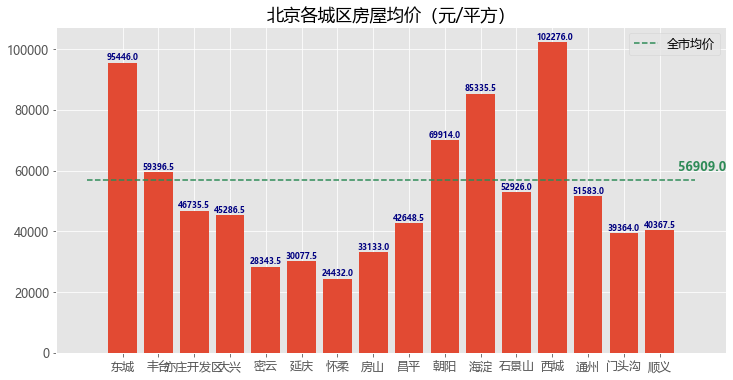

In [13]:
price_group_mean = bj_new.groupby('城区')['单价/平'].median()
price_mean = bj_new['单价/平'].median()
plt.figure(figsize=(12,6))
plt.bar(range(16),price_group_mean)
plt.plot(range(-1,17),np.ones(18)*price_mean,color='seagreen',linestyle='--',label='全市均价')
for i in range(16):
    plt.text(i-0.45, price_group_mean[i]+1000, str(price_group_mean[i]), color='navy', fontweight='bold',fontsize=8)
plt.text(15.5, price_mean+3000, str(price_mean), color='seagreen', fontweight='bold')
plt.xticks(range(16),list(price_group_mean.index))
plt.legend()
plt.title("北京各城区房屋均价（元/平方）");

可见西城的均价是最高的，102276元/平方；最低的是怀柔，24432元/平方。16个城区中，超过全市均价（56909元/平方）的城区有5个：东城，丰台，朝阳，海淀，西城。

看看这5个城区的二手房数量占全市的比例：

In [14]:
district_n = bj_new['城区'].value_counts()
district_n

昌平       3060
朝阳       3000
海淀       3000
丰台       2900
大兴       1816
通州       1795
西城       1279
顺义       1140
东城       1112
房山        773
石景山       643
亦庄开发区     524
门头沟       325
密云          6
怀柔          2
延庆          2
Name: 城区, dtype: int64

In [15]:
top5_d = ['东城','丰台','朝阳','海淀','西城']
top5_else = [i for i in list(district_n.index) if i not in top5_d]
district_n['其他'] = district_n[top5_else].sum()
district_new = district_n.drop(top5_else)

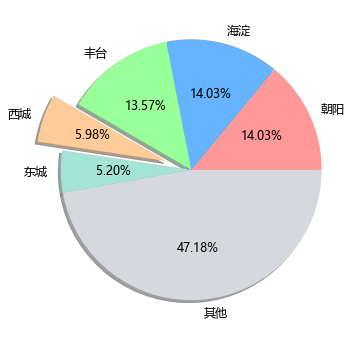

In [16]:
plt.figure(figsize=(6,6))
plt.pie(district_new,labels=list(district_new.index),autopct='%1.2f%%',shadow=True,
        explode=(0,0,0,0.2,0,0),colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#A3E4D7','#D5D8DC']);

超过全市二手房均价的城区，总数量恰好约占全市的一半。均价最高的西城和东城是占比最少的。

再看看均价前10的小区：

In [17]:
court_group_mean = bj_new.groupby('小区')['单价/平'].median()
top10 = court_group_mean.sort_values(ascending=False).head(10)
top10

小区
光大水墨风景       149961.0
兵马司胡同6号院     149885.0
红玺台          149862.0
新文化街四合院      149057.0
六铺炕一区        147551.0
官园胡同         147475.0
小石桥胡同3号院     147278.0
佟麟阁路62号院     147084.0
新外大街28号院     147018.0
碧水云天         146920.0
Name: 单价/平, dtype: float64

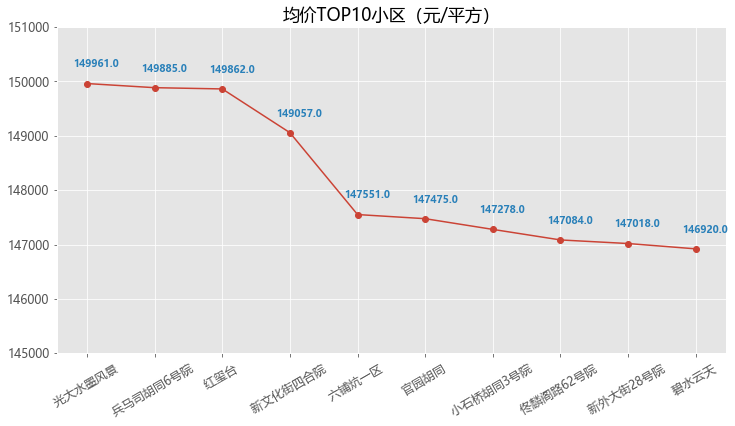

In [18]:
plt.figure(figsize=(12,6))
plt.plot(range(10),top10,marker='o',color='#CB4335')
for i in range(10):
    plt.text(i-0.2, top10[i]+300, str(top10[i]), color='#2980B9', fontweight='bold',fontsize=10)
plt.xticks(range(10),list(top10.index),rotation=30)
plt.ylim([145000,151000])
plt.title("均价TOP10小区（元/平方）");

最难成交的十处房屋：  
发布时间超过一年，观看次数多还卖不出去的

In [19]:
hard_top10 = bj_new.sort_values(['发布时间','观看次数'],ascending=False).head(10)
hard_top10

,简介,小区,户型,面积,关注人数,观看次数,发布时间,房价,单价/平,城区
13774,顶层带露台，简单装修，南北通透一居室，,名佳花园三区,1室1厅,67.00,750.0,449.0,365,318.0,47463.0,昌平
14100,三面采光全明南北朝向 正对小区绿地花园,顶秀青溪,3室2厅,154.62,170.0,332.0,365,900.0,58208.0,昌平
4634,天润福熙大道 2室1厅 940万,天润福熙大道,2室1厅,107.16,114.0,320.0,365,940.0,87720.0,朝阳
14119,南北通透 通风性好 格局方正 采光充足,顶秀青溪,3室2厅,149.81,121.0,249.0,365,900.0,60077.0,昌平
9252,芳星园三区 1室1厅 330万,芳星园三区,1室1厅,48.40,203.0,246.0,365,330.0,68182.0,丰台
7199,橡树湾 5室4厅 2300万,橡树湾,5室4厅,322.43,69.0,236.0,365,2300.0,71334.0,海淀
3791,北京财富公寓 东北三居 景观房 户型合理,北京财富中心,3室2厅,165.84,47.0,216.0,365,1350.0,81404.0,朝阳
4948,国美朝南开间，户型方正，中高楼层，正对花园,国美第一城3号院,1室1厅,47.00,426.0,215.0,365,306.0,65107.0,朝阳
5317,天润福熙大道南向3居 法式洋房 看房随时,天润福熙大道,3室2厅,122.00,128.0,209.0,365,950.0,77869.0,朝阳
1543,南北通透的两居室，户型方正，一层。,新街口西里三区,2室1厅,62.40,373.0,189.0,365,560.0,89744.0,西城


In [20]:
court_hard = hard_top10['小区'].unique()
court_hard

array(['名佳花园三区 ', '顶秀青溪 ', '天润福熙大道 ', '芳星园三区 ', '橡树湾 ', '北京财富中心 ',
       '国美第一城3号院 ', '新街口西里三区 '], dtype=object)

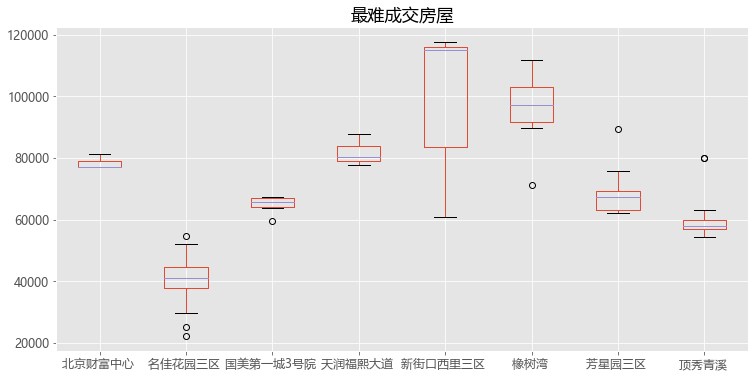

In [21]:
bj_court_hard = bj_new[bj_new['小区'].isin(court_hard)]
boxplot = bj_court_hard.boxplot(column=['单价/平'], by=['小区'],figsize=(12,6))
plt.title('最难成交房屋')
plt.xlabel('')
plt.suptitle('');

In [22]:
court_list = [t.get_text() for t in boxplot.get_xticklabels()]
court_index = []
for i in range(10):
    value = hard_top10.iloc[i,:]['小区']
    ind = court_list.index(value)
    court_index.append(ind)
court_index

[1, 7, 3, 7, 6, 5, 0, 2, 3, 4]

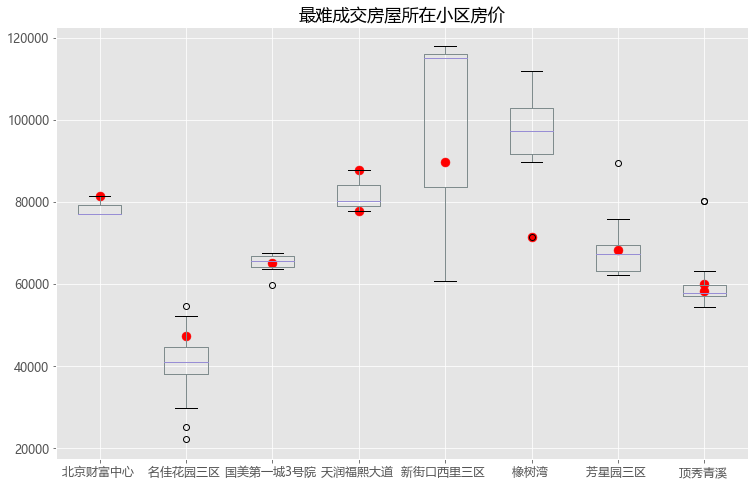

In [23]:
bj_court_hard.boxplot(column=['单价/平'], by=['小区'],figsize=(12,8),color=dict(boxes='#7F8C8D',whiskers='#7F8C8D'))
for i,j in zip(court_index, hard_top10['单价/平']):
    plt.scatter(i+1,j,c='r',s=80)
plt.title('最难成交房屋所在小区房价')
plt.xlabel('')
plt.suptitle('');

在这10个最难成交的房屋中
- 北京财富中心、名佳花园三区、天润福熙大道、芳星园三区、顶秀青溪共6套房屋定价明显高于所在小区的均价；(6)
- 国美第一城3号院的1套房屋定价与小区均价相若；(1)
- 天润福熙大道另一套和新街口西里三区的定价在小区中属于低价；(2)
- 橡树湾的1套远远低于所在小区的所有房屋价格，但该小区价格总体水平较高。(1)

多看一些难成交房屋的状况，分析一下难成交的原因。  

### 价格因素
50个最难成交房屋**价格因素**（定价与所在小区均价对比）：

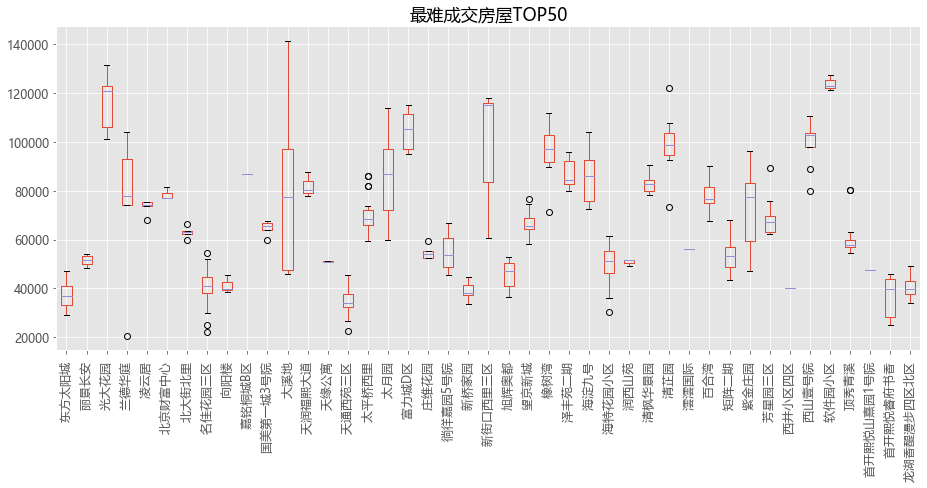

In [24]:
hard_top50 = bj_new.sort_values(['发布时间','观看次数'],ascending=False).head(50)
court_hard50 = hard_top50['小区'].unique()
bj_court_hard50 = bj_new[bj_new['小区'].isin(court_hard50)]
boxplot50 = bj_court_hard50.boxplot(column=['单价/平'], by=['小区'],figsize=(15,6))
plt.title('最难成交房屋TOP50')
plt.xlabel('')
plt.xticks(rotation=90)
plt.suptitle('');

高于小区均价的房屋总数： 17


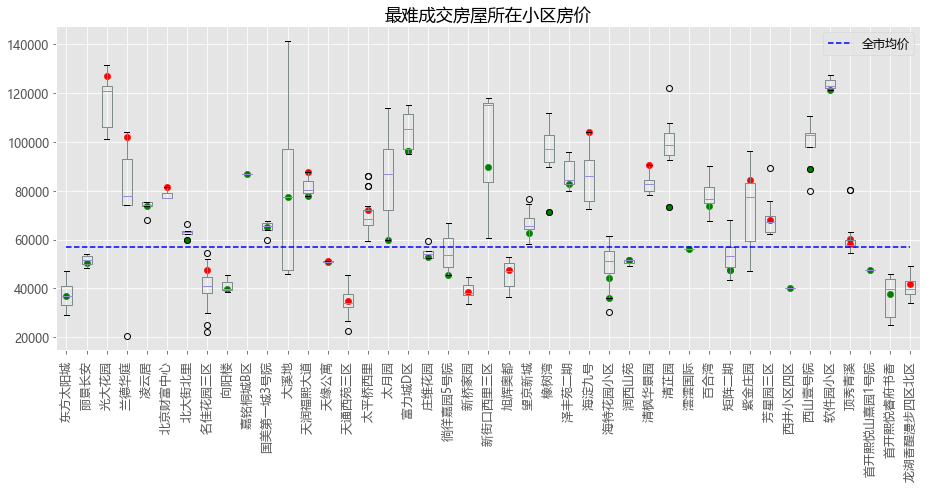

In [25]:
court_list50 = [t.get_text() for t in boxplot50.get_xticklabels()]
court_index50 = []
for i in range(50):
    value = hard_top50.iloc[i,:]['小区']
    ind = court_list50.index(value)
    court_index50.append(ind)

court_median = bj_court_hard50.groupby('小区')['单价/平'].median()    

bj_court_hard50.boxplot(column=['单价/平'], by=['小区'],figsize=(15,6),color=dict(boxes='#7F8C8D',whiskers='#7F8C8D'))
count = 0
for i,j in zip(court_index50, hard_top50['单价/平']):
    if j > court_median[i]:     # 高于小区均价：红色
        plt.scatter(i+1,j,c='r',s=40)
        count = count+1
    else:                       # 等于或小于小区均价：绿色
        plt.scatter(i+1,j,c='g',s=40)
        
plt.plot(range(1,44),np.ones(43)*bj_new['单价/平'].median(),color='b',linestyle='--',label='全市均价')
plt.title('最难成交房屋所在小区房价')
plt.xticks(rotation=90)
plt.xlabel('')
plt.legend()
plt.suptitle('');
print("高于小区均价的房屋总数：", count)

50个最难成交的房屋中，高于所在小区均价的房屋共有17个（红点），可见价格因素对房屋的成交有一定影响，但也存在其他有重要影响的因素。

### 地段因素
50个最难成交房屋**地段因素**（所属城区难交易的数量）：

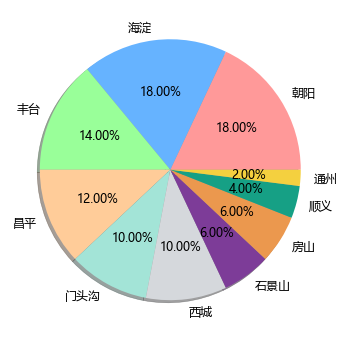

In [26]:
hard_top50_dist = hard_top50['城区'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(hard_top50_dist,labels=list(hard_top50_dist.index),autopct='%1.2f%%',shadow=True,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#A3E4D7','#D5D8DC','#7D3C98','#EB984E','#16A085','#F4D03F']);

其中占比较多的丰台、朝阳、海淀、西城均价都高于全市水平。

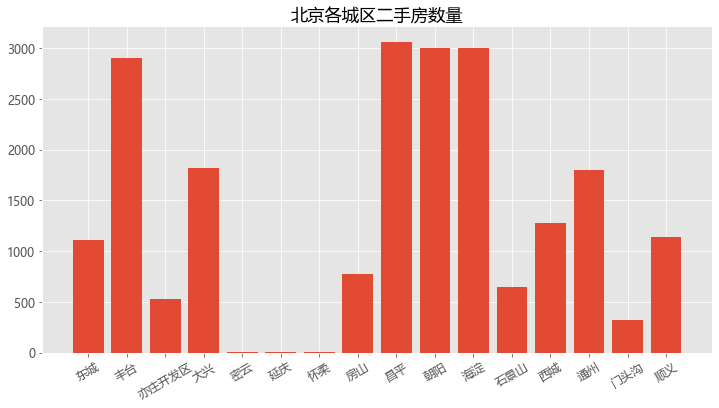

In [27]:
num_dist = bj_new.groupby('城区')['简介'].count()

plt.figure(figsize=(12,6))
plt.bar(range(16),num_dist)
plt.xticks(range(16),list(num_dist.index),rotation=30)
plt.title("北京各城区二手房数量");

可见前50最难成交的房屋中，占比最多的海淀、朝阳、丰台、昌平四区，在北京的总二手房数量也是最多的。

### 户型统计

In [28]:
hard_top50['户型'].value_counts()

 3室2厅     13
 2室1厅     12
 3室1厅      8
 4室2厅      6
 1室1厅      5
 4室1厅      2
 5室2厅      1
 5室4厅      1
 2室2厅      1
 联排别墅      1
Name: 户型, dtype: int64

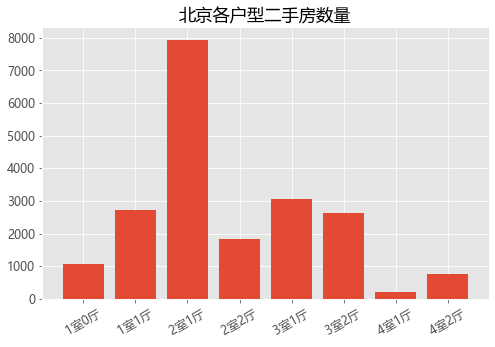

In [29]:
num_style = bj_new.groupby('户型')['简介'].count()
num_style = num_style[num_style > 200]    # 数量过少的忽略

plt.figure(figsize=(8,5))
plt.bar(range(len(num_style)),num_style)
plt.xticks(range(len(num_style)),list(num_style.index),rotation=30)
plt.title("北京各户型二手房数量");

前50最难成交的房屋中，
- 户型最多为 *3室2厅* 和 *2室1厅*，其中2室1厅是全市最常见的户型，总数量是其他各种户型的两倍多；
- 其次的 *3室1厅* 和 *1室1厅* ，这两种户型的数量差不多；
- 而 *4室2厅* 户型，在全市总数量就较少。

**综上所述，在50个最难成交的二手房中**
- 定价高于所在小区的有17个，位于丰台、朝阳、海淀、西城这4个均价高于全市平均水平的城区，数量占比约为60%，可见有受价格影响的因素，但价格因素不是唯一重要因素；
- 户型多为3室2厅和2室1厅，这两种户型难成交的数量相差不远，但全市总体中2室1厅的总数量约为3室2厅的3倍。